# Exploring a large-scale archive data-set

## Using pandas

### Introduction

#### Dataset

This is an attempt to explore a large archive data-set with computerized methods. The dataset is a card-file of the Dutch-Australian migrants after World War II until the early 1990s, containing 51,525 system cards with data about the migrant units under the care of the Dutch consulates in Australia. In the early 2000s the cards were shipped to the Netherlands and transferred to the National Archives in The Hague, where they now are accessible under inventory number (NL-HaNA) NT00335. 

At the time of transferral a simple database was compiled with some basic data on the migrant units on the cards, with a basic ordering of a sequel number that corresponded to the order in which the cards were processed.

The cards were also scanned, but no relation between the card-image (2 per card, a front and a back) and the records was maintained. In effect, there are now 51,525 records and 103,050 images, organized by folders that (supposedly) correspond to the the original drawers and have designations like _"Brisbane A-B"_ or _"Sydney-F-H"_. According to the database, the consulates Brisbane, Melbourne and Sydney were represented. On basis of these first assessments, we have no way of telling whether this is all there ever was. It is also unclear whether there were once more extensive files on the migrants at the consulates. If there were, they have been destroyed at some time.

#### Assessment

This ensemble is in itself a closed whole, of which the database gives only a very superficial access. It is also likely that the database contains errors, but they are difficult to assess without comparing them to the cards. The cards are difficult to process by conventional computerized methods like ocr, as they contain a mixture of type-written and handwritten text in a variety of hands. Moreover, texts are dispersed over the cards. On first inspection they contain some model that prescribed where to put the information, but this was maintained loosely and not consistently over the cards. ![sample card image](images/sample_cards_aarsse.png)

A completely computerized analysis of the data-set was therefore impossible, but because of the amount of data, hand processing was also out of the question because of the sheer size. In this, this dataset is by no means unique. In most of the twentieth century, many, many card files were kept for administrative purposes by probably all governments in the world. And while an unknown portion of these physical databanks were later transferred to computer databases in one form or another, and many others were destroyed because they were obsolete, the archives still hold considerable numbers of these card files. They all share the problem that they usually are hard to process in a computerized way, and too large to grasp by manual methods. Apart from the intrinsic value of the Dutch-Australian migrant card-files, this makes exploring them also important from a methodological point of view.

Moreover, these cards were only part of the story. While we had to assume that all of the original files the cards gave access had been destroyed, there were at least the immigrant files in the Australian archives of the Immigration Services, kept in the Australian archives. Because the cards have information about a very large proportion of all post-WWII Dutch migrants to Australia

#### Approaches

We decided to approach the migrant cards using a combination of manual and computerized methods, keeping in mind that using any computer assisted method was preferable even for minor tasks, because they could save time. Essentially, this was a two-person endeavour, with occasional help by volunteers and interns, unless we would be able to get a grant. The complexity of the tasks at hand and the unknown territory required a step-wise approach, some of which were devises at the onset and others we worked out along the way.


##### sample

The first step was to draw a sample from the cards to see what type of information was on them and to systemize that. We took a one percent sample, consisting of every one hundrest card (2 images), 500 cards in total. It appeared that some migrants had sequel cards; we also included those in the sample. Without going into detail of the analysis of the sample, there were two vital conclusions:

* it appeared that the cards contain basically information about migrant units, instead of individual migrants. Migrant units usually, but by no means always, are families, but for instance can also be men travelling alone, mothers with children joining their husbands and brothers and sisters travelling together. 
* in addition to the information in the basic database, the cards contain information about religion, places of origin in The Netherlands, occupation, addresses in Australia etc
* the cards essentially recorded the interaction between the consulates and the migrants. Sometimes information was summarily, not containing more than the basic facts mentioned before, but sometimes the information was very extensive.

##### linking images

The second step was to link the images to the database. This was essentially a manual task that included walking through the original drawers. While it would seem that the cards were digitized using the original ordering as a point of departure (hence the sequel number mentioned above), this appeared to be true only in a very loose sense. The original drawers may still be recognized in the folders with images, but often portions are in a different order or can be found in another folder. This is undoubtedly a result from physical manipulation of the cards at some time in the process of storage and transfer to the archives. As as we already saw, some migrants also have sequel cards that breaks the assumption of one card per migrant (unit). These complications made it impossible to rely on a fully automatic linking of records and images. However, the basic assumption that there was a correspondence of a record to two images was valid in enough cases to take that as a point of departure and correct the sequences by hand in case of a disruption of the order. We processed the dataset folder per folder, where a folder roughly corresponded with one drawer with a thousand migrant cards (and some two thousand images). For this, we cut up the database using the original indications of the folder, correcting them along the way. Occasionally, cards were omitted from the database altogether. Then we added them by hand. Sometimes, the images could not be found. Then we kept the record under the assumption that it was an omission in the scanning procedure. 

At the moment of writing, we have processed 30 out of 52 folders, making sure they are evenly distributed among the three consulates represented in the dataset (Brisbane, Melbourne, Sydney), which is more than half of the total set, a good basis for further analysis.

##### information density

Automatic processing of all of the information on cards is impossible at the moment. Some partial results may be attained by first segmenting the images, but this is a complicated and time consuming tasks, of which the yield is unsure, so we postponed that to a later stage. 

Using computer vision, we came up with some other approaches to the challenge at hand. 

1. First, part of the cards are fully or partially typed. In addition, there are tiny fragments of pre-printed text, such as the model of the cards. These can be processed using OCR software. 
2. Second, some cards are densely written, while other are virtually empty. This can be measured by using a computer vision that essentially measures the number of pen strokes or typed. There are several such measures, but experiments showed that they give comparable results. We chose to use the edges as a measure of the information density per card.

### Notebook
This is preliminary works, that is taken a step further in the notebook below. We use [pandas ](http://pandas.pydata.org/) for data exploration and [matplotlib](http://matplotlib.org) and [seaborn](http://seaborn.pydata.org) for visualization.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/database/image_es/es_ims_withyr.csv")

df['date'] = pd.to_datetime(df['yr'], format='%Y-%m-%d', errors='coerce')

print (df.columns)

#first summarize our dataset with builtin pandas describe
df.describe()




Index(['parent', 'yr', 'image', 'bak', 'kaart', 'aantekening', 'id', 'url',
       'edges', 'locr', 'ocr', 'consulaat', 'date'],
      dtype='object')


,image,bak,edges,locr,ocr,consulaat
count,65114.000000,65114.000000,60456.000000,0.0,0.0,60457.000000
mean,1119.827948,25.134718,1147.055197,NaN,NaN,24.259705
std,664.831580,17.192822,1017.360572,NaN,NaN,17.473620
min,1.000000,1.000000,0.000000,NaN,NaN,1.000000
25%,543.000000,8.000000,424.000000,NaN,NaN,7.000000
50%,1103.000000,29.000000,999.000000,NaN,NaN,28.000000
75%,1680.000000,42.000000,1548.000000,NaN,NaN,43.000000
max,2490.000000,49.000000,14197.000000,NaN,NaN,49.000000


In [2]:
df.head()

,parent,yr,image,bak,kaart,aantekening,id,url,edges,locr,ocr,consulaat,date
0,76f9a99e-e8eb-102c-b6de-005056a23d00,1950-12-01,1,32,76f9a99e-e8eb-102c-b6de-005056a23d00,NaN,32_0001,https://migrantcards.huygens.knaw.nl/cards/32/...,341.0,NaN,NaN,32.0,1950-12-01
1,76f9a99e-e8eb-102c-b6de-005056a23d00,1950-12-01,2,32,76f9a99e-e8eb-102c-b6de-005056a23d00,NaN,32_0002,https://migrantcards.huygens.knaw.nl/cards/32/...,21.0,NaN,NaN,32.0,1950-12-01
2,76f9aeee-e8eb-102c-b6de-005056a23d00,1954-07-08,3,32,76f9aeee-e8eb-102c-b6de-005056a23d00,NaN,32_0003,https://migrantcards.huygens.knaw.nl/cards/32/...,5352.0,NaN,NaN,32.0,1954-07-08
3,76f9aeee-e8eb-102c-b6de-005056a23d00,1954-07-08,4,32,76f9aeee-e8eb-102c-b6de-005056a23d00,NaN,32_0004,https://migrantcards.huygens.knaw.nl/cards/32/...,7189.0,NaN,NaN,32.0,1954-07-08
4,76f9b420-e8eb-102c-b6de-005056a23d00,1950-07-08,5,32,76f9b420-e8eb-102c-b6de-005056a23d00,NaN,32_0005,https://migrantcards.huygens.knaw.nl/cards/32/...,1875.0,NaN,NaN,32.0,1950-07-08


We start with an overview of the distribution over time, of cards and of the mean density on the cards

In [3]:
#we group the images by card

grouped_cards = df.groupby('parent')

x = grouped_cards['image'].count()

# and show the distribution of the images. 
x.value_counts().sort_index(0)

# With odd numbers something fishy is going on!
# the high numbers are probably artefacts or mistakes in the data

1        41
2     28111
3         4
4       710
6        84
8         9
10        5
12        2
14        1
16        1
20        1
22        1
34        1
Name: image, dtype: int64

In [ ]:
y = df.pivot

fig, ax = plt.subplots(figsize=(20,15)) 
fig.suptitle("Barplot 1: distribution of images per person", fontsize=20)
ax.set_xlabel('xlabel', fontsize=18)
ax.set_ylabel('images', fontsize=18)

x.plot("bar")

In [5]:
date_df = pd.pivot_table(df, values='image', index=['bak','kaart'], columns=df.date.dt.year, aggfunc='count')
date_df = df.set_index('date')
for item in range(1945, 1992):
    tempset = date_df.loc['{item}-6-1'.format(item=item) :'{item}-6-10'.format(item=item + 1)]
    print("%s-%s - cards: %s, mean edges: %s " % (item, item + 1, tempset.image.count(), tempset.edges.mean()))

1945-1946 - cards: 16, mean edges: 1240.1875 
1946-1947 - cards: 20, mean edges: 968.65 
1947-1948 - cards: 44, mean edges: 684.181818182 
1948-1949 - cards: 90, mean edges: 976.766666667 
1949-1950 - cards: 440, mean edges: 1020.30227273 
1950-1951 - cards: 1624, mean edges: 987.641625616 
1951-1952 - cards: 1308, mean edges: 1002.19877676 
1952-1953 - cards: 1710, mean edges: 934.51754386 
1953-1954 - cards: 1843, mean edges: 994.511665762 
1954-1955 - cards: 3010, mean edges: 1002.4282392 
1955-1956 - cards: 4177, mean edges: 1296.48934642 
1956-1957 - cards: 3233, mean edges: 1307.55552119 
1957-1958 - cards: 2485, mean edges: 1414.01770624 
1958-1959 - cards: 2759, mean edges: 1393.96592968 
1959-1960 - cards: 2856, mean edges: 1389.88830532 
1960-1961 - cards: 2457, mean edges: 1508.65893366 
1961-1962 - cards: 1217, mean edges: 1384.29745275 
1962-1963 - cards: 893, mean edges: 1488.11198208 
1963-1964 - cards: 1226, mean edges: 1723.72430669 
1964-1965 - cards: 1279, mean edges

A simple graph can give us an impression of the distribution of emigration cards per year

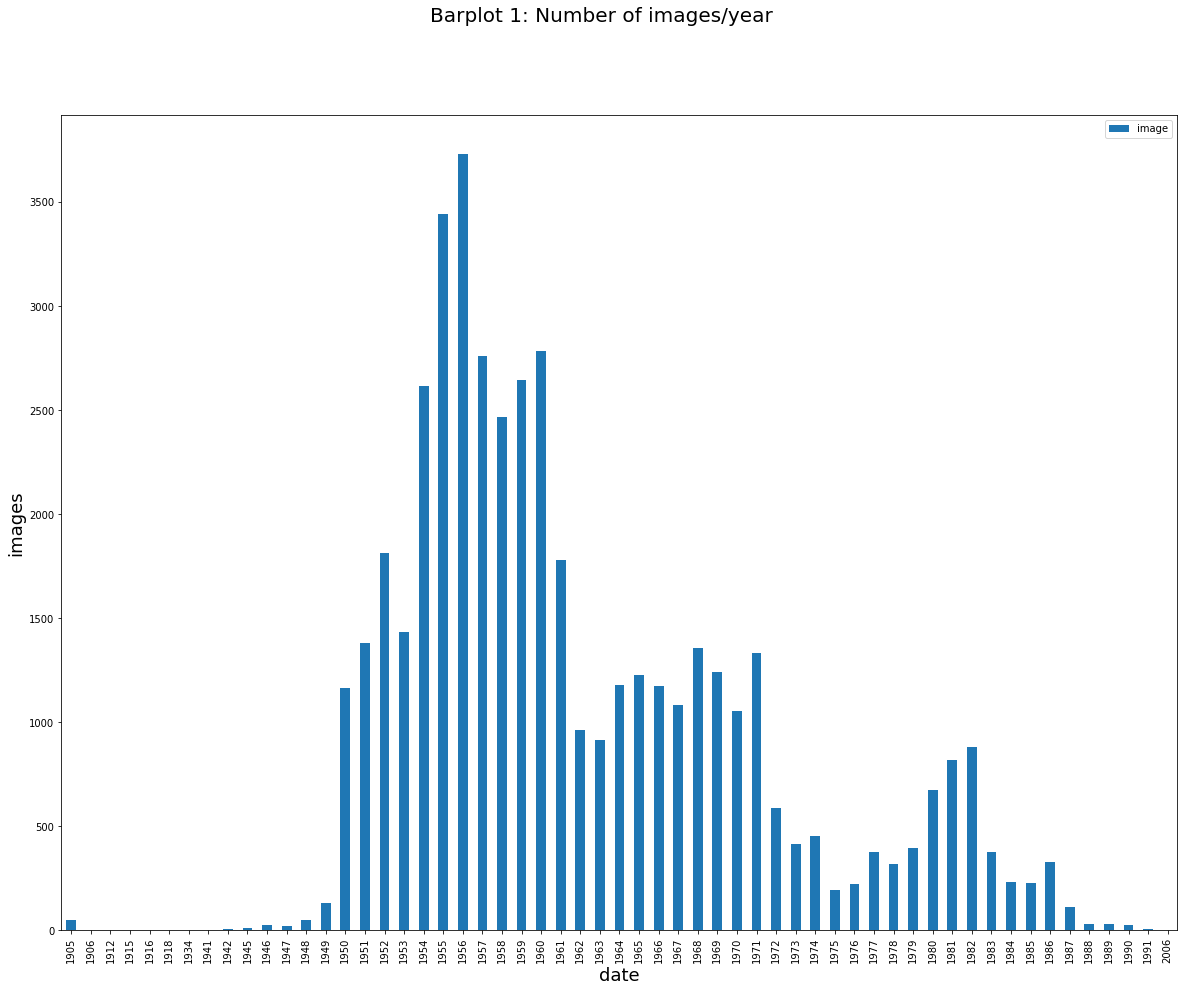

In [6]:

df.date.dropna()
pd_ = pd.pivot_table(df, values='image',  index=df.date.dropna().dt.strftime("%Y"), aggfunc='count') # use the dropna pandas method to remove all records without a time

fig, ax = plt.subplots(figsize=(20,15)) 
fig.suptitle("Barplot 1: Number of images/year", fontsize=20)
ax.set_xlabel('xlabel', fontsize=18)
ax.set_ylabel('images', fontsize=18)

pd_.plot.bar(xlim=(1945,1992), ax=ax)



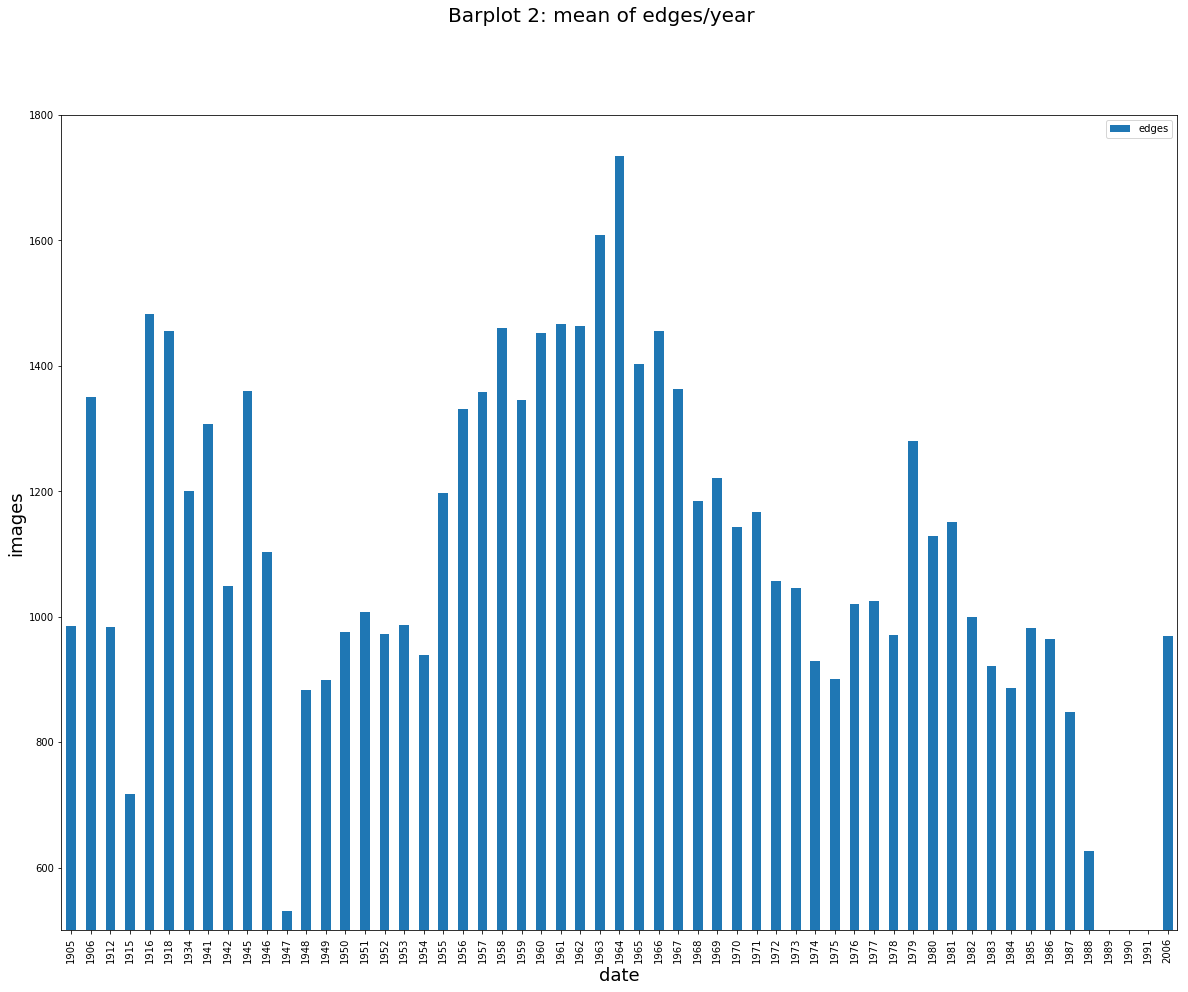

In [7]:
#and now for the mean of the edges
df.date.dropna()
#df.groupby('parent')
pd_ = pd.pivot_table(df, values='edges',  index=df.date.dropna().dt.strftime("%Y"),  aggfunc='mean') # use the dropna pandas method to remove all records without a time

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle("Barplot 2: mean of edges/year", fontsize=20)
ax.set_xlabel('xlabel', fontsize=18)
ax.set_ylabel('images', fontsize=18)
pd_.plot.bar(ylim=(500, 1800), ax=ax) # TODO: should limit this to 1945-1992

## Analysis

These barplots of the distribution of cards and edges over time are a first exploration of the database. Note that they are only a partial analysis of the whole database, as the connection between images and cards had to be established partly by hand, by curating the dataset (as described elsewhere). 

Eyeballing gives some general correlation in trends; we will leave further exploration until later. Note, however that the two graphs show completely different views: _barplot 1_ shows absolute numbers of cards while _barplot 2_ shows the mean value of the number of edges, an aggregate that is not connected with the number of images. That is, a single image for a year may yield much higher mean edges values than the mean edges of one hundred images.

Below, we will show these values in another way and analyse them some further 

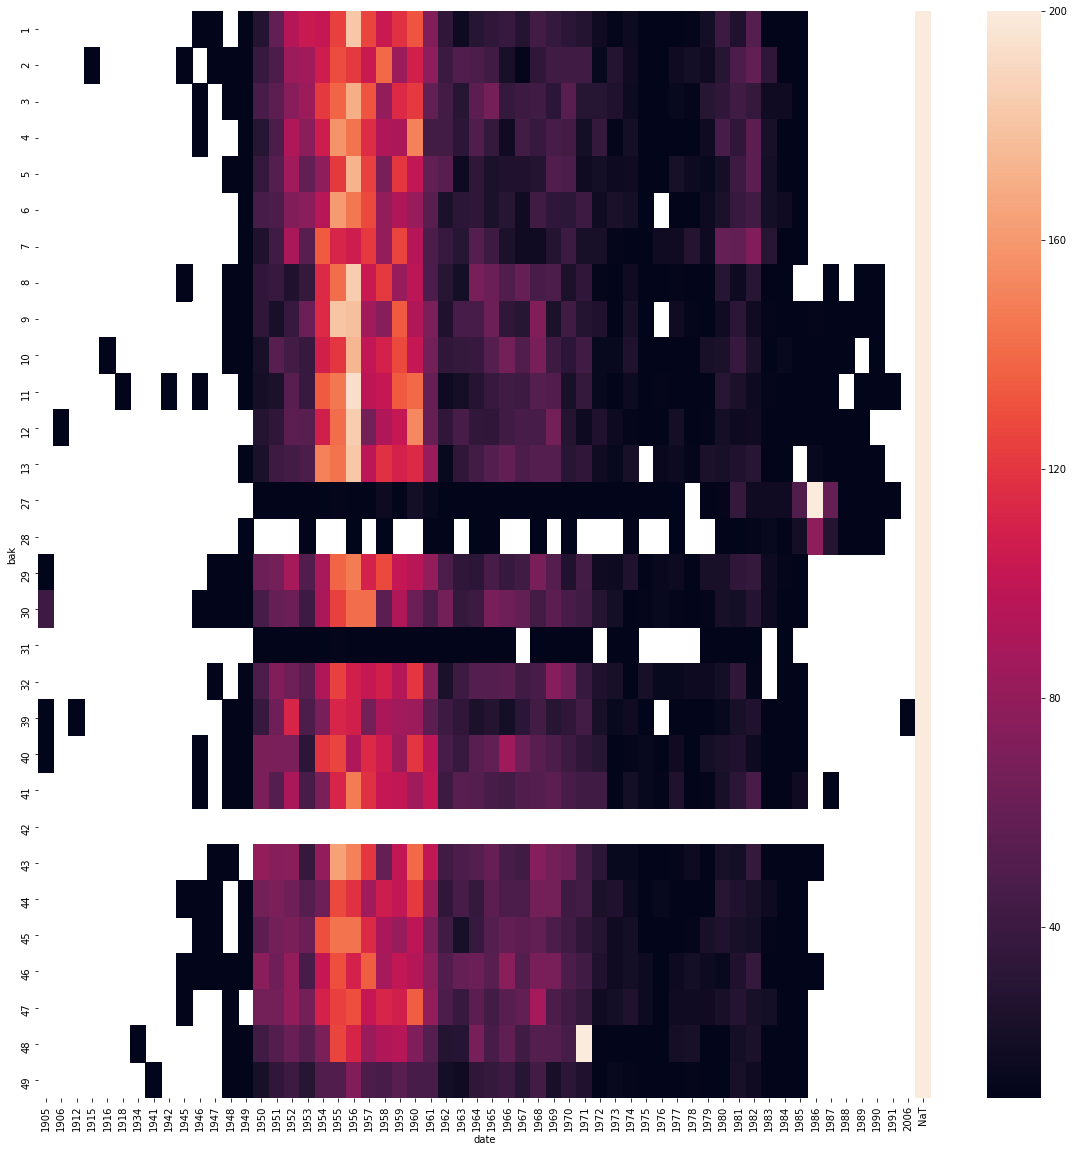

In [8]:

# pivot dataset on images (count values), per drawer ('bak' - index) per year ('yr' - columns)
dfx = pd.pivot_table(df, values='image', index=['bak'], columns=df.date.dt.strftime("%Y"), aggfunc='count')

# visualize a heatmap pet year and image. I tweaked the heatmap for color thresholds. See https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(dfx, vmin=10, vmax=200, ax=ax)

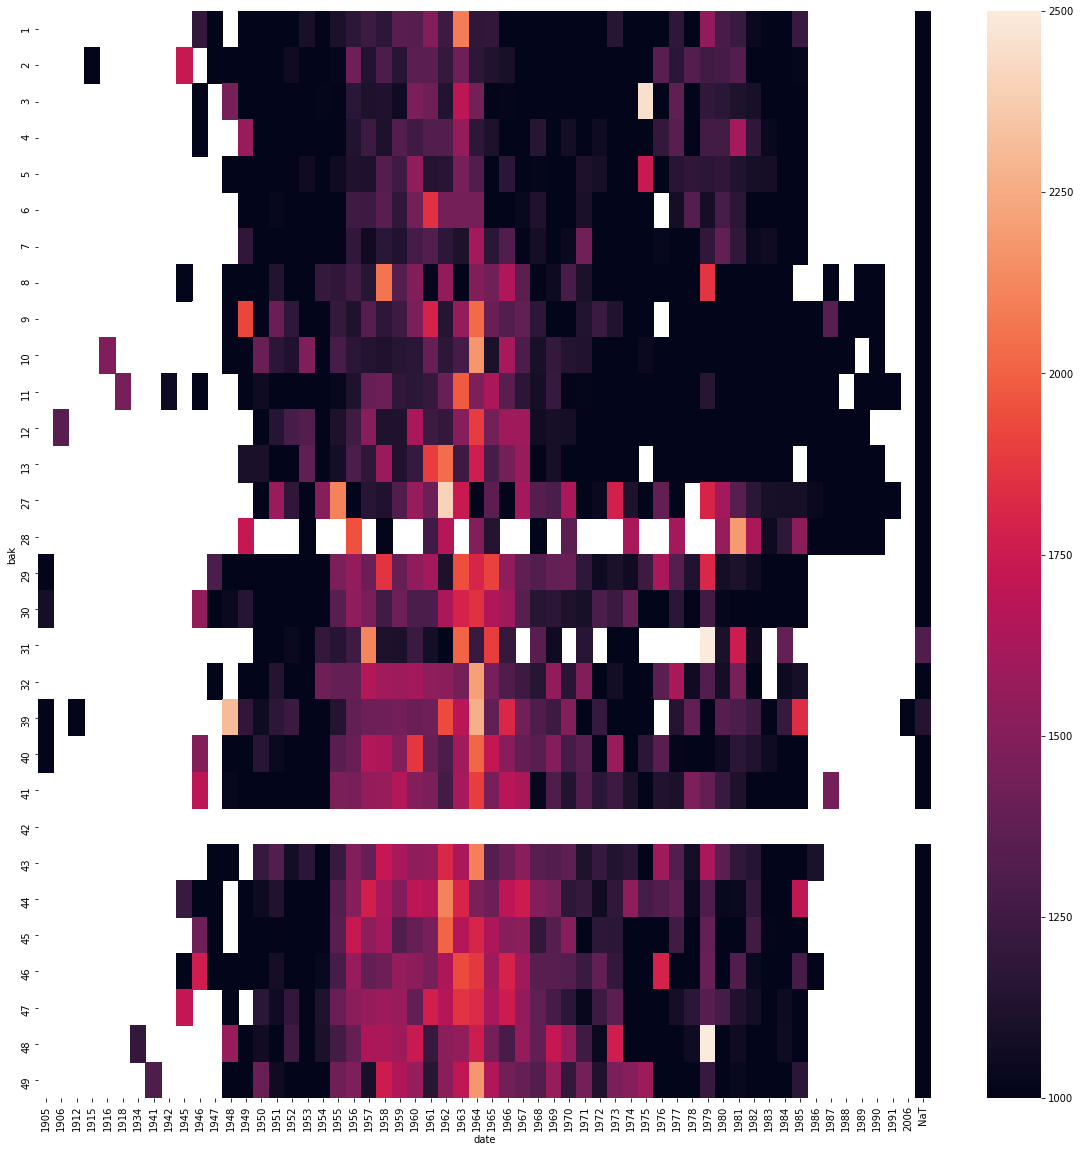

In [9]:
#compare that to the distribution of the edges
bakdf = pd.pivot_table(df, values='edges', index=['bak'], columns=df.date.dt.strftime("%Y"), aggfunc='mean')
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(bakdf, vmin=1000, vmax=2500, ax=ax)


## Analysis

These heatmaps show the heatmaps of the drawers ('bak'). 

_errors_

We could already see that in the barplots, but here it is even more clear that while the administrative apparatus of the consulates dealing with the migrants only started after WWII, there are in fact also hits for the period before 1945, and many without a date (designated with 'NaT' by the pandas software). Cards with a date before 1945 mean that there were errors in data entry; cards without a date may either mean data entry errors or missing information on the cards. These obvious mistakes and missing information should alert us that, of course, there will likely be errors in the cards with valid dates as well, that are less easily detected in the graph. 

We decided that we would not systematically correct these errors and missing information. But we still have to decide how to deal with it. 

* The obvious errors will be discarded from the analysis
* For the hidden errors we will assume that they are effectively random and cancel each other out, so they will be included in the analysis

Further analysis on basis of sample of the cards (see below) that allow for an assessment of the nature of the mistakes, whether there are systematic errors involved. On this basis, we can then decide if and how we can systematically correct them.

_patterns_

The heat plots have a lot of detail, but still summarize on average number of edges per year. As the drawers contain basically parts of the cards from consulates, ordered by alphabet (at least before they got shuffled a bit), the drawers are in themselves not very useful as units that should best be grouped by consulates. That is, of course, unless there are special drawers. We can only find that out if we know the general patterns for the consulates. 



In [10]:
# get consulates from file

consulates = pd.read_csv('/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/database/bakken_geordend/bakken.csv')
consulates['consulate'] = consulates.archieflink.str.rsplit('/').str.get(-1).str.rsplit(' ', n=1).str.get(0)

consulates.head() # these are the consulates according to the database

,aantal,archieflink,nr,consulate
0,1116,NL-HaNA/NT00335////Brisbane A-B/Brisbane,1,Brisbane
1,1152,NL-HaNA/NT00335////Brisbane C-G/Brisbane,2,Brisbane
2,1210,NL-HaNA/NT00335////Brisbane H-KN/Brisbane,3,Brisbane
3,1150,NL-HaNA/NT00335////Brisbane ko-m/Brisbane,4,Brisbane
4,1053,NL-HaNA/NT00335////Brisbane N-R/Brisbane,5,Brisbane


for completeness is here the code to join the consulates with the dataframe (in markdown, so that it will not execute)

    ndf = pd.merge(df, consulates, left_on = 'bak', right_on = 'nr')
    ndf = ndf.drop(['nr', 'consulaat', 'aantal', 'archieflink'], axis=1)
    ndf.to_csv("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/database/image_es/es_ims_withyrandcons.csv")

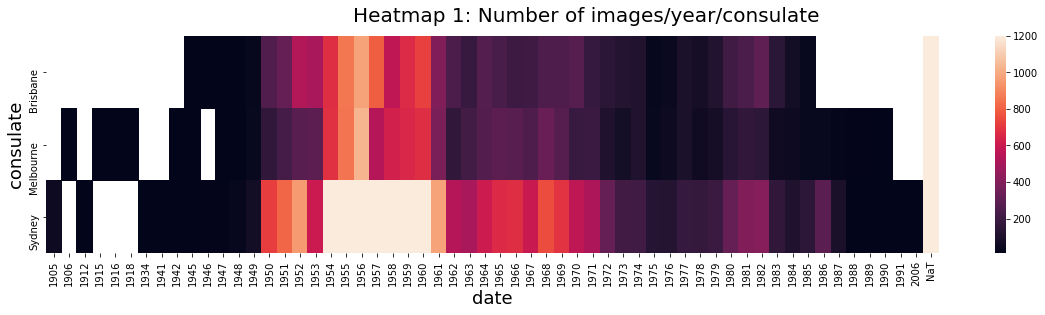

In [11]:
ndf = pd.read_csv("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/database/image_es/es_ims_withyrandcons.csv")

# pivot dataset on images (count values), per drawer ('bak' - index) per year ('yr' - columns)
dfx = pd.pivot_table(ndf, values='image', index=['consulate'], columns=df.date.dt.strftime("%Y"), aggfunc='count')

# visualize a heatmap per year and image. I tweaked the heatmap for color thresholds. See https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
fig, ax = plt.subplots(figsize=(20,4))         # Sample figsize in inches
fig.suptitle("Heatmap 1: Number of images/year/consulate", fontsize=20)
ax.set_xlabel('year', fontsize=18)
ax.set_ylabel('images', fontsize=18)
sns.heatmap(dfx, vmin=10, vmax=1200, ax=ax)

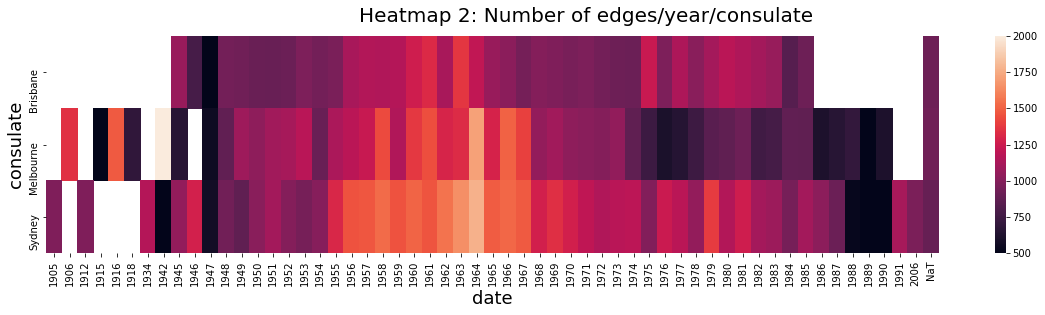

In [12]:
#compare that to the distribution of the edges
consulate = pd.pivot_table(ndf, values='edges', index=['consulate'], columns=df.date.dt.strftime("%Y"), aggfunc='mean')
fig, ax = plt.subplots(figsize=(20,4))         # Sample figsize in inches
fig.suptitle("Heatmap 2: Number of edges/year/consulate", fontsize=20)
ax.set_xlabel('year', fontsize=18)
ax.set_ylabel('images', fontsize=18)
sns.heatmap(consulate, vmin=500, vmax=2000, ax=ax)

In [13]:
ndf['date'] = pd.to_datetime(df['yr'], format='%Y-%m-%d', errors='coerce')
grouped_cards = ndf.groupby(['parent', 'date', 'consulate'], as_index=False)['edges', ].sum()
dfx = pd.pivot_table(grouped_cards, values='edges', columns=['consulate'], index=grouped_cards.date.dt.strftime("%Y"), aggfunc='count')




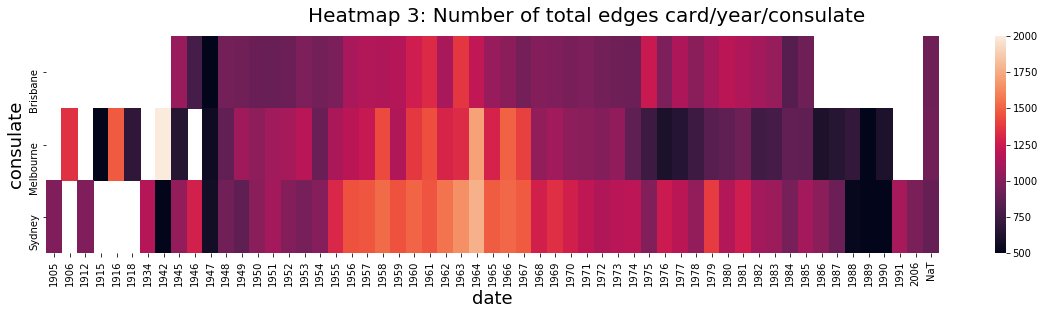

In [14]:
fig, ax = plt.subplots(figsize=(20,4))         # Sample figsize in inches
fig.suptitle("Heatmap 3: Number of total edges card/year/consulate", fontsize=20)
ax.set_xlabel('year', fontsize=18)
ax.set_ylabel('images', fontsize=18)
sns.heatmap(consulate, vmin=500, vmax=2000, ax=ax)

# which is more or less the same as above, not surprisingly as this is a rough measure

## Analysis

The heatmaps above show the number of cards (_heatmap 1_) and the average information density per card per year (_heatmap 2_). There are some differences between the consulates. We should discard the values from before 1945; these are mistakes in the database. Sydney is most prominent in both number of cards and average information density (measured as the density of writing). Brisbane was less prominent in both respects.

In all three consulates, there was shift in the number of cards (i.e. the number of arriving migrants), where the peak was in the second half of the 1950s and the density of the information, where there was a peak in the early 1960s until the later 1960, with a rivival in the late 1970s.

_Heatmap 3_ compares the total (mean) number of edges per cards (that is, on average 2 images per card, but see above for precise numbers). This is not noticeable different from the edges graph, which was to be expected, but just to be sure.

